<center>
    <h1>Projet N°1 : Provisionnement Non Vie </h1>
</center>
<hr>

# Outils

In [1]:
# # Installation des packages
# install.packages("ChainLadder")
# install.packages("readxl")
# install.packages("scales")
# install.packages("ggplot2")
# install.packages('IRkernel')
# install.packages('knitr', dependencies = TRUE)
# install.packages("kableExtra")

# Les packages
require(ChainLadder)
suppressPackageStartupMessages(library(ChainLadder))
library(readxl)
library(scales)
library(ggplot2)
library(repr)
library(knitr)
library(kableExtra)
library(IRdisplay)

# Fixer la taille des figures
options(repr.plot.width=15, repr.plot.height=12)

# Eliminer les warnings
options(warn=-1)

Loading required package: ChainLadder


Welcome to ChainLadder version 0.2.11

Type vignette('ChainLadder', package='ChainLadder') to access
the overall package documentation.

See demo(package='ChainLadder') for a list of demos.

More information is available on the ChainLadder project web-site:
https://github.com/mages/ChainLadder

To suppress this message use:
suppressPackageStartupMessages(library(ChainLadder))




In [2]:
# Une fonction qui sert à l'affichage des estimations
display_estimations = function(df){
    cs_dt <- df[]
    row.names(cs_dt) = row.names(df)
    colnames(cs_dt) = cell_spec(colnames(cs_dt),  bold = TRUE, font_size = "medium", color = "black",align = "justify")
    rownames(cs_dt) = cell_spec(rownames(cs_dt),  bold = TRUE, font_size = "medium", color = "black",align = "justify")

    for (i in 1:10){
        for (j in 1:10){
            cs_dt[i,j] = cell_spec(format(round(df[i,j]), big.mark=" "), background = ifelse( i==2  & j==10 |
                                                                        i==3  & j==9  | i==3  & j==10 |
                                                                        i==4  & j==8  | i==4  & j==9  | i==4  & j==10 |
                                                                        i==5  & j==7  | i==5  & j==8  | i==5  & j==9  | i==5  & j==10 |
                                                                        i==6  & j==6  | i==6  & j==7  | i==6  & j==8  | i==6  & j==9  | i==6  & j==10 |
                                                                        i==7  & j==5  | i==7  & j==6  | i==7  & j==7  | i==7  & j==8  | i==7  & j==9  | i==7  & j==10 |
                                                                        i==8  & j==4  | i==8  & j==5  | i==8  & j==6  | i==8  & j==7  | i==8  & j==8  | i==8  & j==9 |  i==8  & j==10 |
                                                                        i==9  & j==3  | i==9  & j==4  | i==9  & j==5  | i==9  & j==6  | i==9  & j==7  | i==9  & j==8  | i==9  & j==9  | i==9  & j==10 |
                                                                        i==10 & j==2  | i==10 & j==3  | i==10 & j==4  | i==10 & j==5  | i==10 & j==6  | i==10 & j==7  | i==10 & j==8  | i==10 & j==9  | i==10 & j==10,

                                                                  "#e5df4c","white"),align = "c",font_size="medium")
    
}
}

kbl(cs_dt, escape = F) %>%
  kable_paper(full_width = F)%>%
  as.character() %>%
  display_html()
}


### Contenu

* [Chargement et Analyse des triangles](#Chargement_des_triangles)
    * [Chargement des triangles](#Chargement)
    * [Triangles des cadences](#cadences)
    * [Analyse des cadences](#analyse_cadences)
* [Méthode de Chain Ladder](#Methode_de_chain_ladder)
    * [Triangle des ouvertures](#Triangle_des_ouvertures)
    * [Triangle des reglements](#Triangle_des_reglements)
    * [Triangle des charges](#Triangle_des_charges)
* [Méthode de Mack Chain Ladder](#Methode_de_mack_chain_ladder)
    * [Triangle des ouvertures](#Triangle_des_ouvertures2)
    * [Triangle des reglements](#Triangle_des_reglements2)
* [Méthode de Bootstrap_Chain Ladder](#Methode_de_bootstrap_chain_ladder)
    * [Triangle des ouvertures](#Triangle_des_ouvertures3)
    * [Triangle des reglements](#Triangle_des_reglements3)
* [Calcul de la prime aquise et des S/P de chaque année](#prime)

# Chargement et Analyse des triangles <a class="anchor" id="Chargement_des_triangles"></a>

## Chargement des triangles <a class="anchor" id="Chargement"></a>

In [3]:
# Cahargement du triangle des ouvertures
NB = read_excel("../input/data-triangles3//Data.xlsx", sheet = "NB")
rows = NB$NB
NB$NB = NULL
row.names(NB) = rows

# Chargement du triangle des reglements
REG = read_excel("../input/data-triangles3//Data.xlsx", sheet = "REG")
REG$REG = NULL
row.names(REG) = rows

# Chargement du triangle des charges
SAP = read_excel("../input/data-triangles3//Data.xlsx", sheet = "SAP")
SAP$SAP = NULL
row.names(SAP) = rows

## Calcul du cumul

In [4]:
# triangle des ouvertures
nb = incr2cum(NB)
format(nb, big.mark=" ")
# triangle des reglements
reg = incr2cum(REG)
format(reg, big.mark=" ")
# triangle des charges
tri_charge = reg+SAP
format(tri_charge, big.mark=" ")

,1,2,3,4,5,6,7,8,9,10
2005,31 116,33 092,33 280,33 344,33 356,33 360,33 360,33 362,33 362,33 362
2006,31 198,33 120,33 246,33 282,33 294,33 298,33 298,33 298,33 298,NA
2007,35 850,37 760,37 892,37 948,37 960,37 970,37 974,37 976,NA,NA
2008,37 860,39 864,40 004,40 066,40 074,40 078,40 082,NA,NA,NA
2009,31 142,33 112,33 290,33 352,33 358,33 362,NA,NA,NA,NA
2010,32 930,34 724,34 908,34 948,34 964,NA,NA,NA,NA,NA
2011,36 808,38 638,38 824,38 908,NA,NA,NA,NA,NA,NA
2012,37 568,39 790,39 956,NA,NA,NA,NA,NA,NA,NA
2013,37 966,40 400,NA,NA,NA,NA,NA,NA,NA,NA
2014,36 480,NA,NA,NA,NA,NA,NA,NA,NA,NA


,1,2,3,4,5,6,7,8,9,10
2005,932 885.1,4 170 107.6,5 178 741.3,5 895 582.6,6 101 204.1,6 142 991.4,6 201 205.8,6 339 424.5,6 340 571.9,6 359 225.8
2006,754 417.4,3 466 602.5,5 314 858.1,5 765 461.0,5 929 663.4,6 059 290.4,6 091 617.6,6 149 260.3,6 156 665.2,NA
2007,978 419.0,5 103 958.3,6 778 747.0,7 246 933.5,7 464 957.2,7 583 026.3,7 609 861.5,7 696 705.5,NA,NA
2008,1 316 441.5,6 021 787.6,7 555 658.3,8 053 227.9,8 327 442.5,8 449 895.1,8 497 100.4,NA,NA,NA
2009,1 515 113.7,7 237 752.8,8 623 381.4,9 198 258.7,9 396 272.9,9 521 142.4,NA,NA,NA,NA
2010,2 228 111.4,8 471 438.7,10 040 083.8,10 577 748.5,10 784 701.5,NA,NA,NA,NA,NA
2011,2 444 956.4,10 146 801.5,12 415 451.1,12 882 217.8,NA,NA,NA,NA,NA,NA
2012,2 270 647.8,11 959 203.7,14 344 968.2,NA,NA,NA,NA,NA,NA,NA
2013,2 591 381.9,11 791 984.0,NA,NA,NA,NA,NA,NA,NA,NA
2014,2 045 750.8,NA,NA,NA,NA,NA,NA,NA,NA,NA


,1,2,3,4,5,6,7,8,9,10
,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>
2005,9 507 579,9 509 400,9 649 835,8 196 995,7 328 808,7 251 425,7 221 812,7 143 342,7 126 992,7 061 740
2006,10 035 217,8 977 878,9 166 818,7 055 943,6 960 307,6 879 378,6 787 966,6 906 810,6 828 271,NA
2007,11 648 405,11 989 432,11 313 405,9 391 193,9 479 657,9 337 734,9 223 029,8 716 294,NA,NA
2008,12 973 407,12 592 678,12 424 984,10 701 676,10 355 875,10 333 477,10 339 700,NA,NA,NA
2009,13 679 208,15 263 639,14 679 525,12 757 313,12 258 505,12 027 302,NA,NA,NA,NA
2010,16 380 847,17 115 457,16 516 950,13 274 230,13 285 078,NA,NA,NA,NA,NA
2011,18 480 776,19 425 857,17 946 691,15 319 054,NA,NA,NA,NA,NA,NA
2012,22 345 606,22 699 530,22 066 408,NA,NA,NA,NA,NA,NA,NA
2013,24 430 824,23 358 362,NA,NA,NA,NA,NA,NA,NA,NA


## Triangle des cadences  <a class="anchor" id="cadences"></a>

In [5]:
# une fonction qui prend en input le triangle et retourne son triangle des cadences
triangle_des_cadences <- function(df) {
    cad = matrix(, nrow = 10, ncol = 10)
    rownames(cad) = rownames(df)
    colnames(cad) = colnames(df)
    for (i in 1:9){
        for (j in 1:9){
            if (is.na(df[i,j])){
                cad[i,j] = NA
            } else{
                cad[i,j+1] = round(df[i,j+1]/df[i,j]*100, digit = 2)
            }
        }
    }
    cad
}


In [6]:
print("Triangle des ouvertures")
cad_nb = triangle_des_cadences(nb)
cad_nb

print("Triangle des reglements")
cad_reg = triangle_des_cadences(reg)
cad_reg

print("Triangle des charges")
cad_charge = triangle_des_cadences(tri_charge)
cad_charge

[1] "Triangle des ouvertures"


,1,2,3,4,5,6,7,8,9,10
2005,NA,106.35,100.57,100.19,100.04,100.01,100.00,100.01,100,100
2006,NA,106.16,100.38,100.11,100.04,100.01,100.00,100.00,100,NA
2007,NA,105.33,100.35,100.15,100.03,100.03,100.01,100.01,NA,NA
2008,NA,105.29,100.35,100.15,100.02,100.01,100.01,NA,NA,NA
2009,NA,106.33,100.54,100.19,100.02,100.01,NA,NA,NA,NA
2010,NA,105.45,100.53,100.11,100.05,NA,NA,NA,NA,NA
2011,NA,104.97,100.48,100.22,NA,NA,NA,NA,NA,NA
2012,NA,105.91,100.42,NA,NA,NA,NA,NA,NA,NA
2013,NA,106.41,NA,NA,NA,NA,NA,NA,NA,NA
2014,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


[1] "Triangle des reglements"


,1,2,3,4,5,6,7,8,9,10
2005,NA,447.01,124.19,113.84,103.49,100.68,100.95,102.23,100.02,100.29
2006,NA,459.51,153.32,108.48,102.85,102.19,100.53,100.95,100.12,NA
2007,NA,521.65,132.81,106.91,103.01,101.58,100.35,101.14,NA,NA
2008,NA,457.43,125.47,106.59,103.41,101.47,100.56,NA,NA,NA
2009,NA,477.70,119.14,106.67,102.15,101.33,NA,NA,NA,NA
2010,NA,380.21,118.52,105.36,101.96,NA,NA,NA,NA,NA
2011,NA,415.01,122.36,103.76,NA,NA,NA,NA,NA,NA
2012,NA,526.69,119.95,NA,NA,NA,NA,NA,NA,NA
2013,NA,455.05,NA,NA,NA,NA,NA,NA,NA,NA
2014,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


[1] "Triangle des charges"


,1,2,3,4,5,6,7,8,9,10
2005,NA,100.02,101.48,84.94,89.41,98.94,99.59,98.91,99.77,99.08
2006,NA,89.46,102.10,76.97,98.64,98.84,98.67,101.75,98.86,NA
2007,NA,102.93,94.36,83.01,100.94,98.50,98.77,94.51,NA,NA
2008,NA,97.07,98.67,86.13,96.77,99.78,100.06,NA,NA,NA
2009,NA,111.58,96.17,86.91,96.09,98.11,NA,NA,NA,NA
2010,NA,104.48,96.50,80.37,100.08,NA,NA,NA,NA,NA
2011,NA,105.11,92.39,85.36,NA,NA,NA,NA,NA,NA
2012,NA,101.58,97.21,NA,NA,NA,NA,NA,NA,NA
2013,NA,95.61,NA,NA,NA,NA,NA,NA,NA,NA
2014,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


## Analyse des cadences  <a class="anchor" id="analyse_cadences"></a>

In [7]:
# Une fonction qui calcule le coefficient de variation
coef_var = function(x){
    pop.sd(x)/mean(x, na.rm=TRUE)*100
}

# Une fonction qui calcule l'ecart-type de la population
pop.sd<-function(x){sqrt(sum((x-mean(x, na.rm=TRUE))^2, 
                                 na.rm=TRUE)/sum(!is.na(x)))}

# Une fonction qui retourne une description du triangle des cadences
summary_cad = function(cad_tri){
    
    # moyenne
    avg = round(apply(cad_tri,2,mean,na.rm=TRUE), digits = 2)

    # ecart-type
    sd = round(apply(cad_tri,2,pop.sd), digits = 2)
    # coef_variance
    coef_var = round(apply(cad_tri,2,coef_var), digits=2)
    
    # Min
    min = round(avg-sd, digits=2)

    # Max
    max = round(avg+sd, digits=2)
    
    summary = rbind(Moyenne = avg, Ecart_type = sd, Coeff_variation = coef_var, Min = min, Max = max)
    summary
}

In [8]:
print("Triangle des ouvertures")
summary_cad(cad_nb)
print("Triangle des reglements")
summary_cad(cad_reg)
print("Triangle des charges")
summary_cad(cad_charge)

[1] "Triangle des ouvertures"


,1,2,3,4,5,6,7,8,9,10
Moyenne,NaN,105.80,100.45,100.16,100.03,100.01,100.00,100.01,100,100
Ecart_type,NaN,0.52,0.08,0.04,0.01,0.01,0.01,0.00,0,0
Coeff_variation,NaN,0.49,0.08,0.04,0.01,0.01,0.00,0.00,0,0
Min,NaN,105.28,100.37,100.12,100.02,100.00,99.99,100.01,100,100
Max,NaN,106.32,100.53,100.20,100.04,100.02,100.01,100.01,100,100


[1] "Triangle des reglements"


,1,2,3,4,5,6,7,8,9,10
Moyenne,NaN,460.03,126.97,107.37,102.81,101.45,100.60,101.44,100.07,100.29
Ecart_type,NaN,43.66,10.85,2.96,0.58,0.48,0.22,0.56,0.05,0.00
Coeff_variation,NaN,9.49,8.54,2.76,0.56,0.48,0.22,0.56,0.05,0.00
Min,NaN,416.37,116.12,104.41,102.23,100.97,100.38,100.88,100.02,100.29
Max,NaN,503.69,137.82,110.33,103.39,101.93,100.82,102.00,100.12,100.29


[1] "Triangle des charges"


,1,2,3,4,5,6,7,8,9,10
Moyenne,NaN,100.87,97.36,83.38,96.99,98.83,99.27,98.39,99.31,99.08
Ecart_type,NaN,6.00,3.10,3.31,3.79,0.56,0.58,2.98,0.45,0.00
Coeff_variation,NaN,5.94,3.19,3.97,3.91,0.56,0.58,3.03,0.46,0.00
Min,NaN,94.87,94.26,80.07,93.20,98.27,98.69,95.41,98.86,99.08
Max,NaN,106.87,100.46,86.69,100.78,99.39,99.85,101.37,99.76,99.08


# Méthode de Chain Ladder <a class="anchor" id="Methode_de_chain_ladder"></a>

## Triangle des ouvertures <a class="anchor" id="Triangle_des_ouvertures"></a>

In [9]:
# calcul des facteurs
n = 10
f_nb <- sapply(1:(n-1),
function(i){
sum(nb[c(1:(n-i)),i+1])/sum(nb[c(1:(n-i)),i])
}
)

# Estimation
nb_cl = nb
for(k in 1:(n-1)){
nb_cl[(n-k+1):n, k+1] = nb_cl[(n-k+1):n,k]*f_nb[k]
}

# Nombre probable de tardifs
NB_tardifs <- rep(NA, 10)
for (i in 1:n){
    NB_tardifs[i] = nb_cl[i,10] - nb_cl[i,n-i+1]
}



# Affichage
print("Les facteurs")

kbl(
rbind(colnames(nb_cl)[1:9], f_nb = label_percent()(f_nb))
) %>%
  kable_paper(full_width = F) %>%
   row_spec(2, bold = T, color = "white", background = "#0284d0") %>%
    as.character() %>%
  display_html()

print("Estimation par la methode de Chain Ladder")
display_estimations(nb_cl)



print("Nombre probable de tardifs")

kbl(cbind(c(row.names(nb_cl),"Total"),
      NB_tardifs = format(c(round(NB_tardifs), round(sum(NB_tardifs))), big.mark=" ")
     )
) %>%
  kable_paper(full_width = F) %>%
   row_spec(11, bold = T, color = "white", background = "#D7261E") %>%
    as.character() %>%
  display_html()

[1] "Les facteurs"


,1,2,3,4,5,6,7,8,9
f_nb,105.7810%,100.4481%,100.1607%,100.0310%,100.0146%,100.0055%,100.0038%,100.0000%,100.0000%


[1] "Estimation par la methode de Chain Ladder"


,1,2,3,4,5,6,7,8,9,10
2005,31 116,33 092,33 280,33 344,33 356,33 360,33 360,33 362,33 362,33 362
2006,31 198,33 120,33 246,33 282,33 294,33 298,33 298,33 298,33 298,33 298
2007,35 850,37 760,37 892,37 948,37 960,37 970,37 974,37 976,37 976,37 976
2008,37 860,39 864,40 004,40 066,40 074,40 078,40 082,40 084,40 084,40 084
2009,31 142,33 112,33 290,33 352,33 358,33 362,33 364,33 365,33 365,33 365
2010,32 930,34 724,34 908,34 948,34 964,34 969,34 971,34 972,34 972,34 972
2011,36 808,38 638,38 824,38 908,38 920,38 926,38 928,38 929,38 929,38 929
2012,37 568,39 790,39 956,40 020,40 033,40 038,40 041,40 042,40 042,40 042
2013,37 966,40 400,40 581,40 646,40 659,40 665,40 667,40 669,40 669,40 669
2014,36 480,38 589,38 762,38 824,38 836,38 842,38 844,38 845,38 845,38 845


[1] "Nombre probable de tardifs"


,NB_tardifs
2005,0
2006,0
2007,0
2008,2
2009,3
2010,8
2011,21
2012,86
2013,269
2014,2 365


## Triangle des reglements <a class="anchor" id="Triangle_des_reglements"></a>

In [10]:
# Calcul des facteurs
n = 10
f_reg <- sapply(1:(n-1),
function(i){
sum(reg[c(1:(n-i)),i+1])/sum(reg[c(1:(n-i)),i])
}
)

# Estimation
reg_cl = reg
for(k in 1:(n-1)){
reg_cl[(n-k+1):n, k+1] <- reg_cl[(n-k+1):n,k]*f_reg[k]
}

# PSAP_REG
PSAP_REG <- rep(NA, 10)
for (i in 1:n){
    PSAP_REG[i] = reg_cl[i,10] -reg_cl[i,n-i+1]
}


# Affichage
print("Les facteurs")
kbl(
rbind(colnames(reg_cl)[1:9], f_reg = label_percent()(f_reg))
) %>%
  kable_paper(full_width = F) %>%
   row_spec(2, bold = T, color = "white", background = "#0284d0") %>%
    as.character() %>%
  display_html()


print("Estimation par la methode de Chain Ladder")
display_estimations(reg_cl)

print("PSAP_REG")


kbl(
cbind(
    c(row.names(reg_cl),"Total"),
    PSAP_REG = format(c(round(PSAP_REG),round(sum(PSAP_REG))), big.mark=" "))
) %>%
  kable_paper(full_width = F) %>%
   row_spec(11, bold = T, color = "white", background = "#D7261E") %>%
    as.character() %>%
  display_html()

[1] "Les facteurs"


,1,2,3,4,5,6,7,8,9
f_reg,454.816%,124.169%,106.641%,102.711%,101.442%,100.583%,101.420%,100.068%,100.294%


[1] "Estimation par la methode de Chain Ladder"


,1,2,3,4,5,6,7,8,9,10
2005,932 885,4 170 108,5 178 741,5 895 583,6 101 204,6 142 991,6 201 206,6 339 424,6 340 572,6 359 226
2006,754 417,3 466 602,5 314 858,5 765 461,5 929 663,6 059 290,6 091 618,6 149 260,6 156 665,6 174 778
2007,978 419,5 103 958,6 778 747,7 246 933,7 464 957,7 583 026,7 609 861,7 696 706,7 701 976,7 724 635
2008,1 316 441,6 021 788,7 555 658,8 053 228,8 327 443,8 449 895,8 497 100,8 617 797,8 623 698,8 649 069
2009,1 515 114,7 237 753,8 623 381,9 198 259,9 396 273,9 521 142,9 576 641,9 712 671,9 719 322,9 747 917
2010,2 228 111,8 471 439,10 040 084,10 577 748,10 784 702,10 940 246,11 004 016,11 160 321,11 167 964,11 200 820
2011,2 444 956,10 146 801,12 415 451,12 882 218,13 231 450,13 422 283,13 500 521,13 692 288,13 701 664,13 741 975
2012,2 270 648,11 959 204,14 344 968,15 297 548,15 712 260,15 938 872,16 031 780,16 259 501,16 270 636,16 318 504
2013,2 591 382,11 791 984,14 641 985,15 614 289,16 037 587,16 268 892,16 363 723,16 596 159,16 607 524,16 656 384
2014,2 045 751,9 304 401,11 553 179,12 320 370,12 654 371,12 836 881,12 911 707,13 095 110,13 104 077,13 142 629


[1] "PSAP_REG"


,PSAP_REG
2005,0
2006,18 113
2007,27 930
2008,151 968
2009,226 774
2010,416 119
2011,859 757
2012,1 973 536
2013,4 864 400
2014,11 096 878


## Triangle des charges <a class="anchor" id="Triangle_des_charges"></a>

In [11]:
# Calcul des facteurs
n = 10
f_sap <- sapply(1:(n-1),
function(i){
sum(tri_charge[c(1:(n-i)),i+1])/sum(tri_charge[c(1:(n-i)),i])
}
)

# Estimation
sap_cl = tri_charge
for(k in 1:(n-1)){
sap_cl[(n-k+1):n, k+1] <- sap_cl[(n-k+1):n,k]*f_sap[k]
}

# PSAP
PSAP <- rep(NA, 10)
for (i in 1:n){
    PSAP[i] = sap_cl[i,10] -sap_cl[i,n-i+1]
}

# PSAP_CHARG = Boni_Mali + PSAP_GEST
PSAP_GEST = rep(NA,10)
PSAP_CHARG = rep(NA,10)
for (i in 1:10){
    PSAP_GEST[i] = SAP[i,n-i+1]
    PSAP_CHARG[i] = as.integer(PSAP_GEST[i]) + PSAP[i]
}
     

# Affichage
print("Les facteurs")


kbl(
rbind(colnames(sap_cl)[1:9], f_sap = label_percent()(f_sap))
) %>%
  kable_paper(full_width = F) %>%
   row_spec(2, bold = T, color = "white", background = "#0284d0") %>%
    as.character() %>%
  display_html()

print("Estimation par la methode de Chain Ladder")
display_estimations(sap_cl)

print("PSAP")


kbl(
      cbind(c(row.names(sap_cl),"Total"),
      PSAP = format(c(round(PSAP), round(sum(PSAP))), big.mark=" "),
      PSAP_GEST = format(c(as.integer(PSAP_GEST), sum(as.integer(PSAP_GEST))), big.mark=" "),
      PSAP_CHARG = format(c(round(PSAP_CHARG), round(sum(PSAP_CHARG))), big.mark=" "))
) %>%
  kable_paper(full_width = F) %>%
   row_spec(11, bold = T, color = "white", background = "#D7261E") %>%
    as.character() %>%
  display_html()

[1] "Les facteurs"


,1,2,3,4,5,6,7,8,9
f_sap,101.0398%,96.7601%,83.6400%,97.2154%,98.8060%,99.3210%,97.9927%,99.3246%,99.0844%


[1] "Estimation par la methode de Chain Ladder"


,1,2,3,4,5,6,7,8,9,10
2005,9 507 579,9 509 400,9 649 835,8 196 995,7 328 808,7 251 425,7 221 812,7 143 342,7 126 992,7 061 740
2006,10 035 217,8 977 878,9 166 818,7 055 943,6 960 307,6 879 378,6 787 966,6 906 810,6 828 271,6 765 754
2007,11 648 405,11 989 432,11 313 405,9 391 193,9 479 657,9 337 734,9 223 029,8 716 294,8 657 427,8 578 163
2008,12 973 407,12 592 678,12 424 984,10 701 676,10 355 875,10 333 477,10 339 700,10 132 148,10 063 719,9 971 579
2009,13 679 208,15 263 639,14 679 525,12 757 313,12 258 505,12 027 302,11 945 640,11 705 851,11 626 794,11 520 343
2010,16 380 847,17 115 457,16 516 950,13 274 230,13 285 078,13 126 448,13 037 322,12 775 620,12 689 338,12 573 159
2011,18 480 776,19 425 857,17 946 691,15 319 054,14 892 478,14 714 655,14 614 746,14 321 379,14 224 658,14 094 422
2012,22 345 606,22 699 530,22 066 408,18 456 349,17 942 412,17 728 172,17 607 801,17 254 354,17 137 824,16 980 916
2013,24 430 824,23 358 362,22 601 579,18 903 966,18 377 564,18 158 128,18 034 839,17 672 819,17 553 463,17 392 750
2014,23 679 537,23 925 762,23 150 595,19 363 164,18 823 975,18 599 209,18 472 924,18 102 111,17 979 855,17 815 239


[1] "PSAP"


,PSAP,PSAP_GEST,PSAP_CHARG
2005,0,702 514,702 514
2006,-62 517,671 606,609 089
2007,-138 131,1 019 588,881 457
2008,-368 121,1 842 600,1 474 479
2009,-506 959,2 506 160,1 999 201
2010,-711 919,2 500 376,1 788 457
2011,-1 224 632,2 436 836,1 212 204
2012,-5 085 492,7 721 440,2 635 948
2013,-5 965 612,11 566 378,5 600 766
2014,-5 864 298,21 633 786,15 769 488


# Méthode de Mack Chain Ladder <a class="anchor" id="Methode_de_mack_chain_ladder"></a>

## Triangle des ouvertures <a class="anchor" id="Triangle_des_ouvertures2"></a>

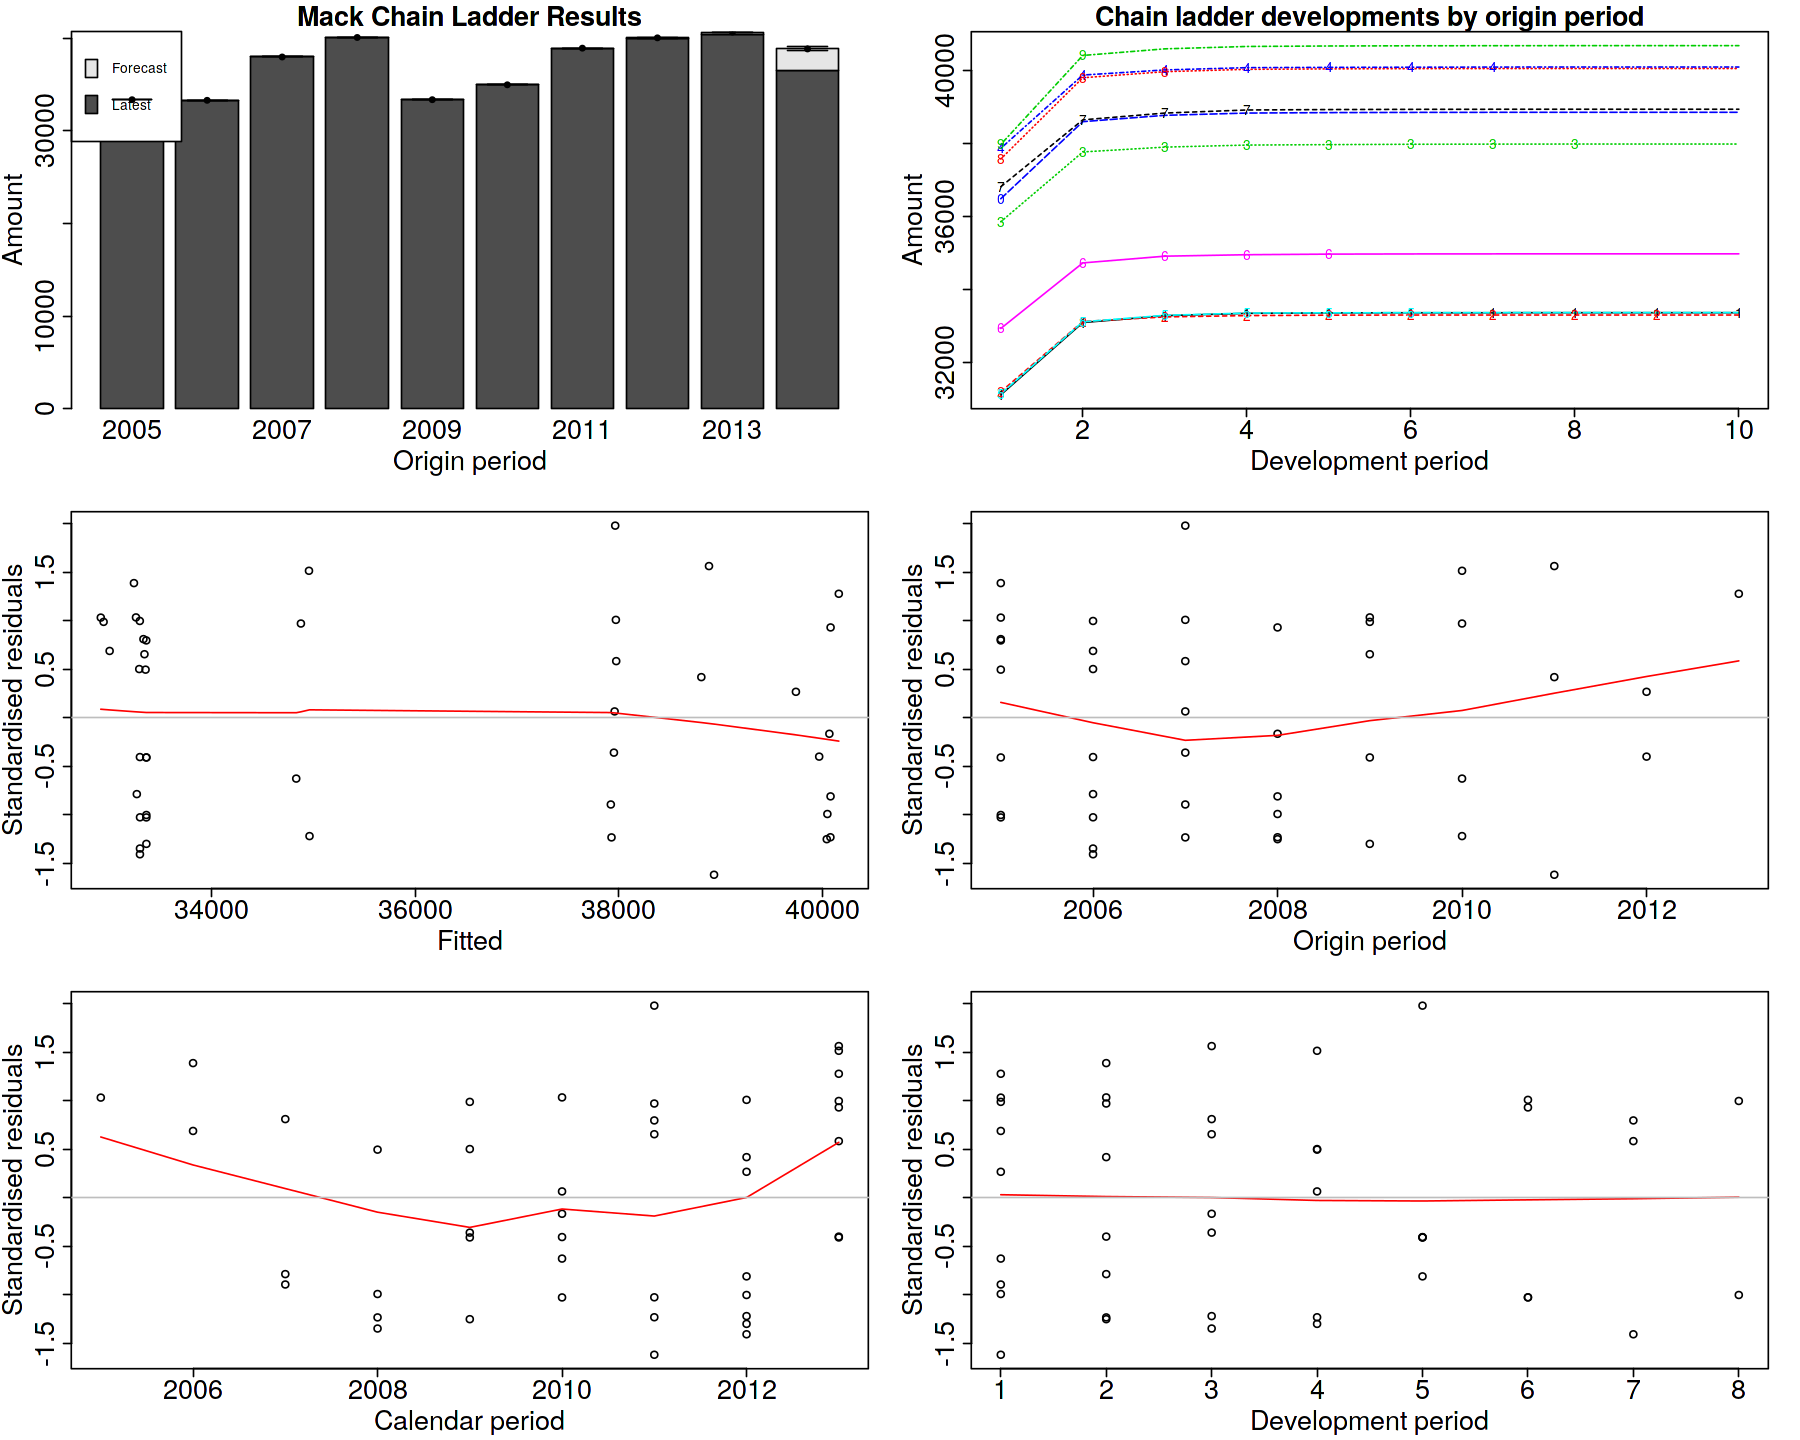

In [12]:
tri_mack_nb = MackChainLadder(nb, est.sigma="Mack")

par(
cex.axis = 2,
cex.lab = 2,
cex.main = 2
)
plot(tri_mack_nb)

## Triangle des reglements <a class="anchor" id="Triangle_des_reglements2"></a>

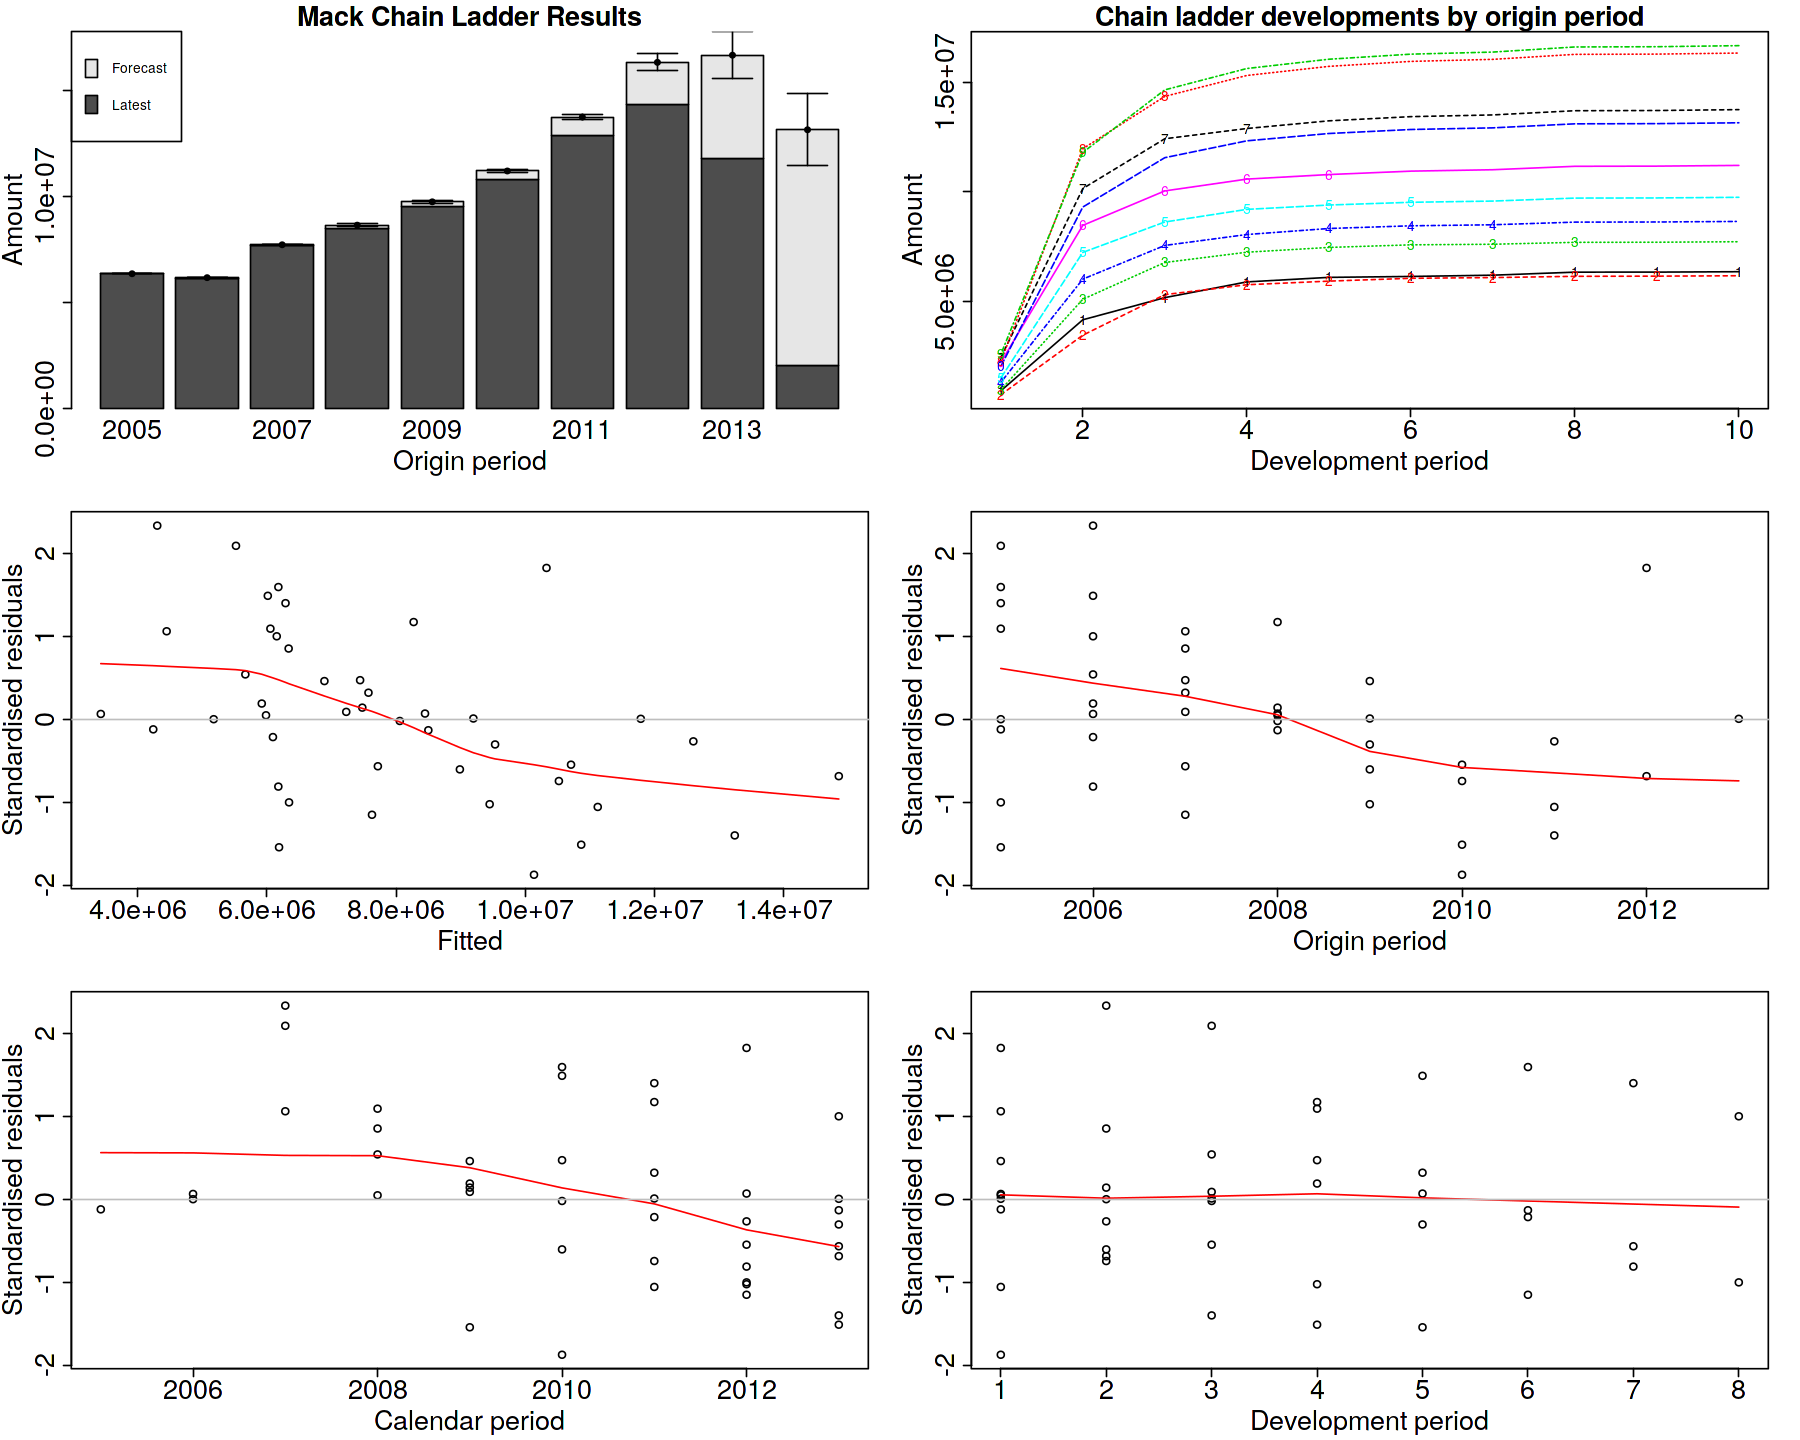

In [13]:
tri_mack_reg = MackChainLadder(reg, est.sigma="Mack")

par(
cex.axis = 2,
cex.lab = 2,
cex.main = 2
)
plot(tri_mack_reg)

# Méthode de Bootstrap Chain Ladder <a class="anchor" id="Methode_de_bootstrap_chain_ladder"></a>

## Triangle des ouvertures <a class="anchor" id="Triangle_des_ouvertures3"></a>

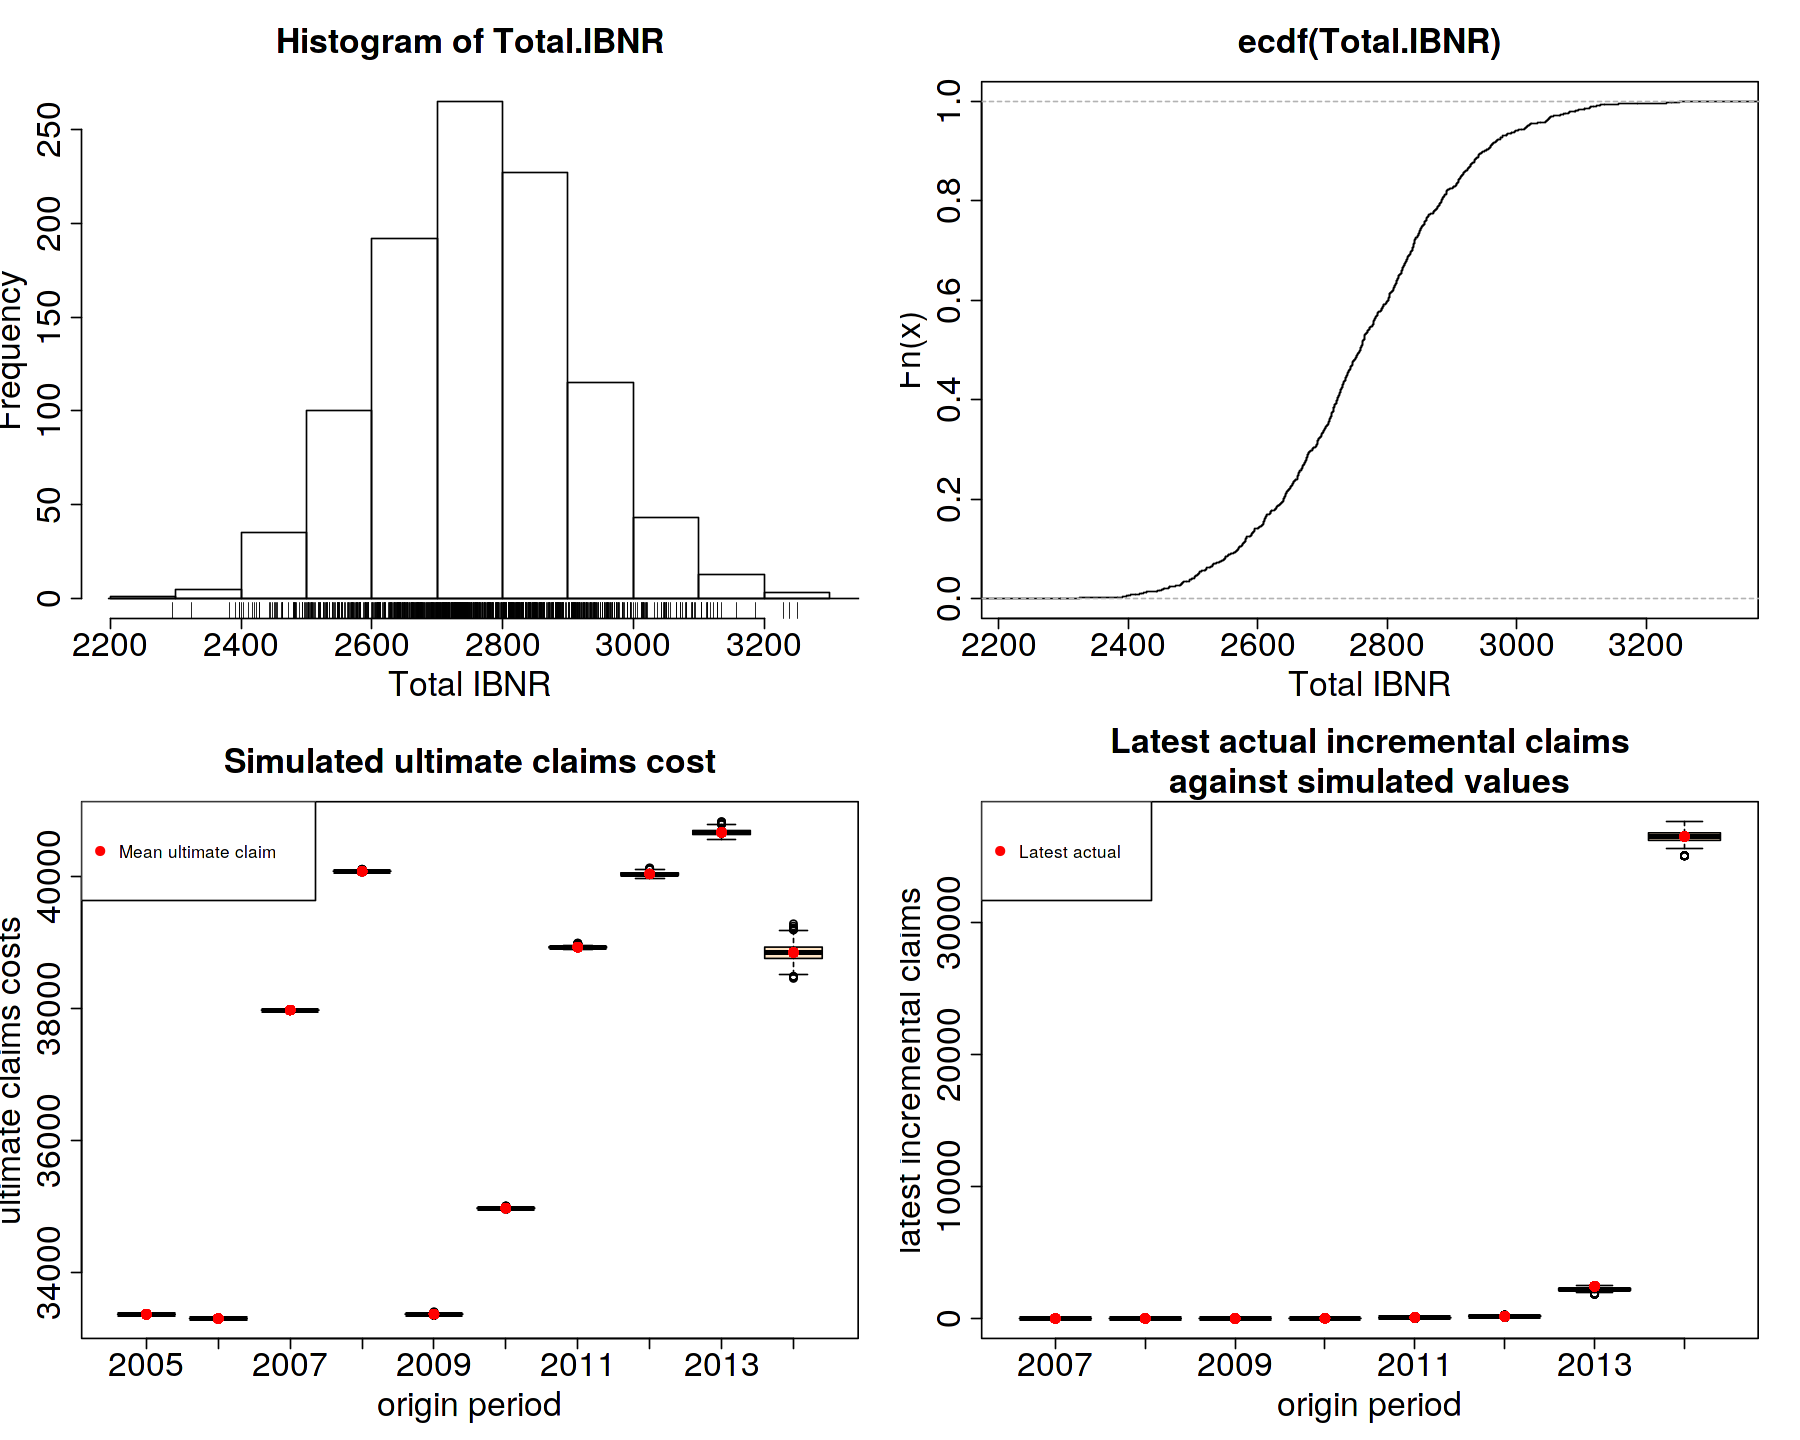

In [14]:
tri_boot_nb = BootChainLadder(nb, R=999, process.distr="gamma")

par(
cex.axis = 2,
cex.lab = 2,
cex.main = 2
)
plot(tri_boot_nb)

## Triangle des reglements <a class="anchor" id="Triangle_des_reglements3"></a>

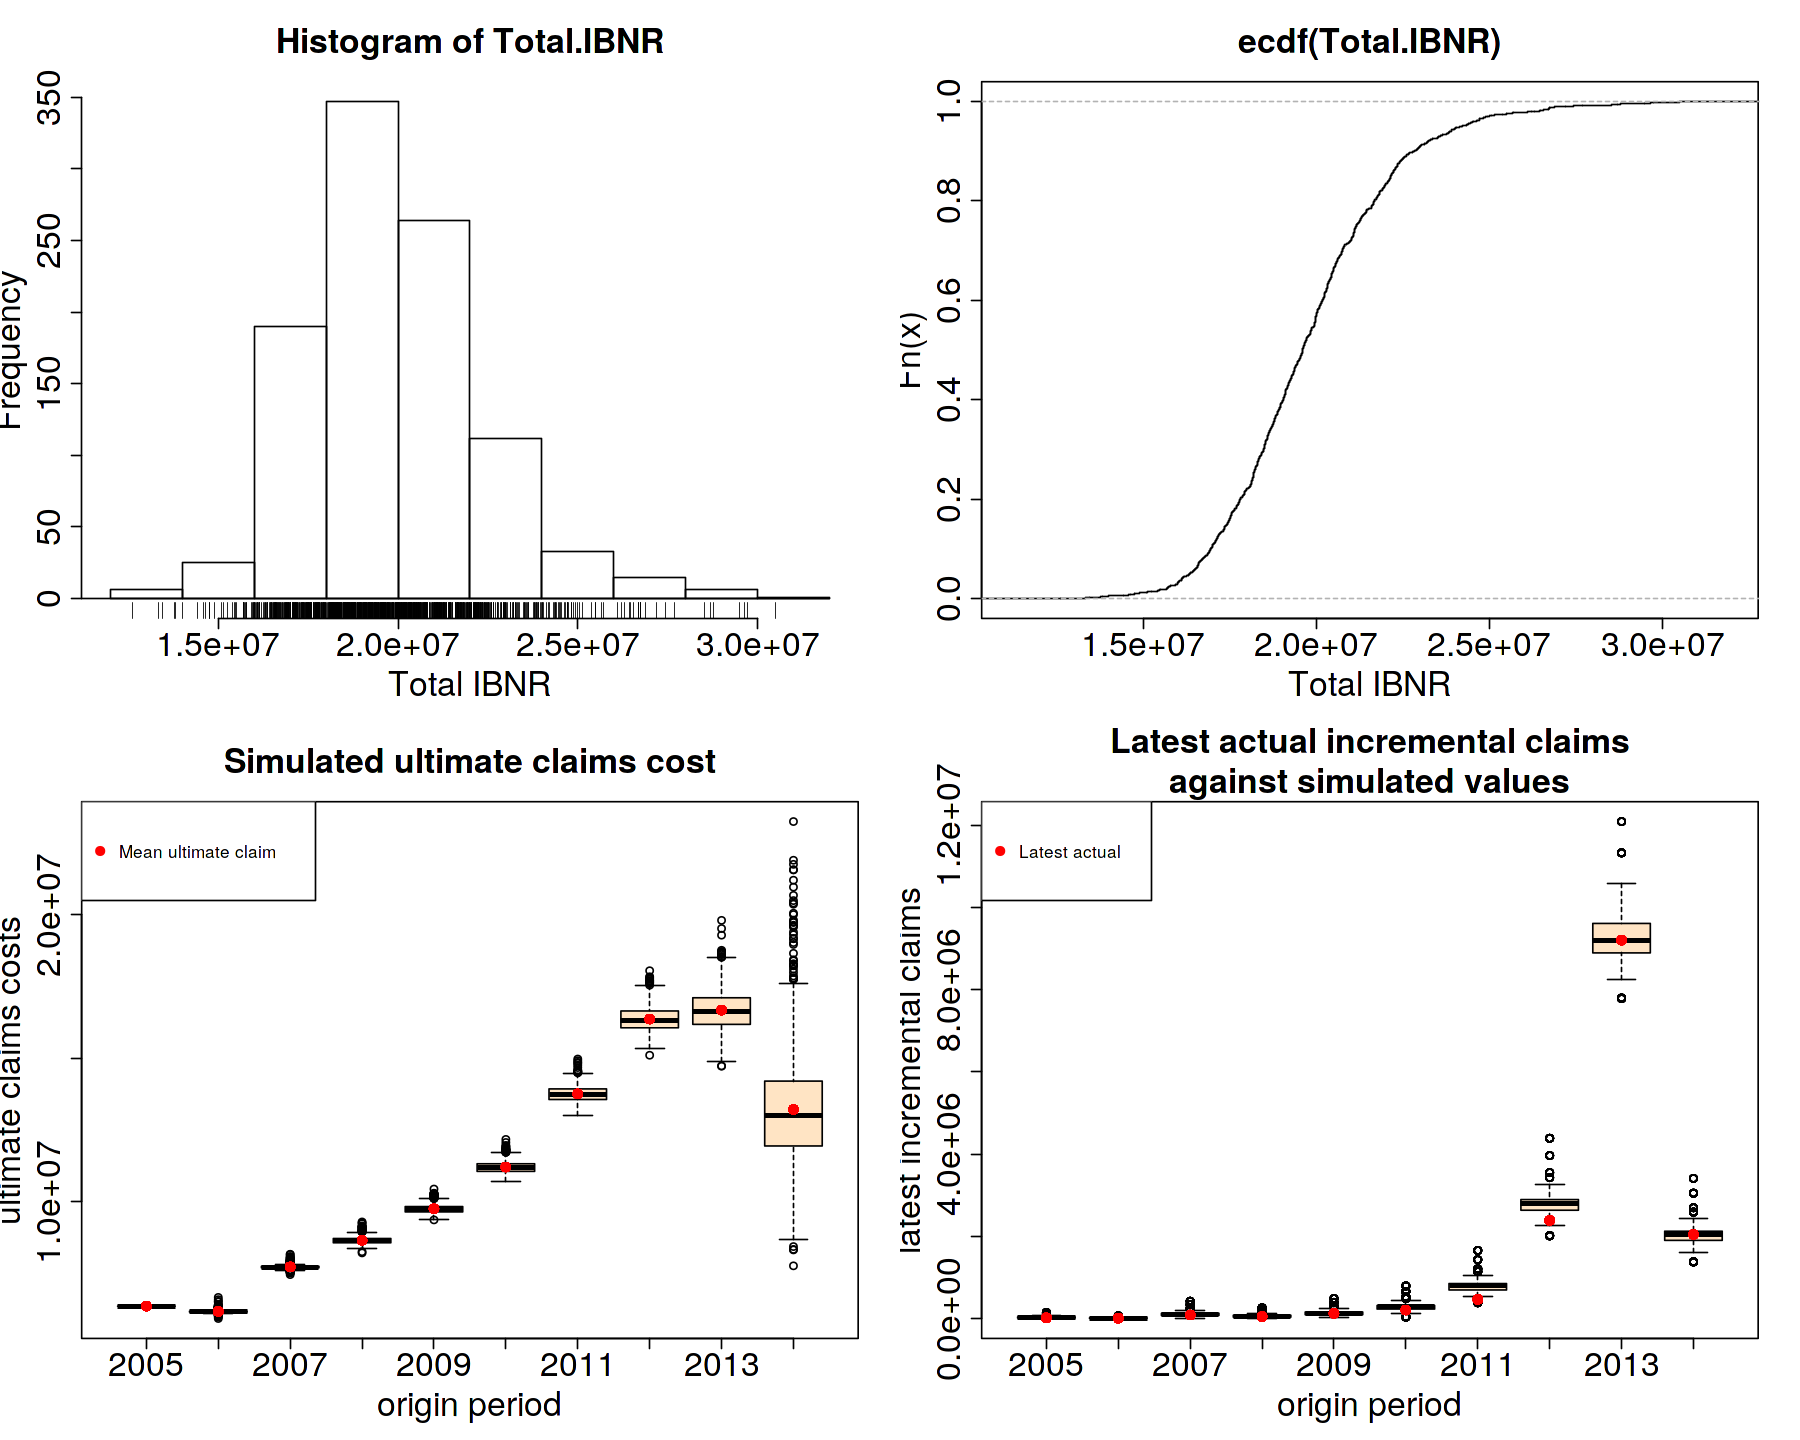

In [15]:
tri_boot_reg = BootChainLadder(reg, R=999, process.distr="gamma")

par(
cex.axis = 2,
cex.lab = 2,
cex.main = 2
)
plot(tri_boot_reg)

__________________________________________________________________________________________________________________________________________________________________________________
# Calcul de la prime aquise et des S/P de chaque année <a class="anchor" id="prime"></a>

In [16]:
pc = rep(NA,10)
un = rep(NA,10)
for (i in 1:10){
    pc[i] = sum(reg_cl[1:(10-i+1),i]) / sum(reg_cl[1:(10-i+1),10])
    un[i] = 1-pc[i]
    
}

# Affichage
kbl(
rbind(colnames(reg_cl)[1:9],"pc" = paste(round(pc*100,digits = 2), "%",sep=""),
      "1-pc" = paste(round(un*100, digits = 2),"%",sep=""))
) %>%
  kable_paper(full_width = F) %>%
    row_spec(1, bold = T) %>%
    column_spec(1, bold = T) %>%
    as.character() %>%
  display_html()

,1,2,3,4,5,6,7,8,9,1
pc,15.57%,70.8%,87.91%,93.74%,96.28%,97.67%,98.24%,99.64%,99.71%,100%
1-pc,84.43%,29.2%,12.09%,6.26%,3.72%,2.33%,1.76%,0.36%,0.29%,0%


In [17]:
loss.ratio.est = rep(NA,10)
loss.ratio.est[1] = 0.95
prime_aquise = rep(NA,10)
prime_aquise[1] = reg_cl[1,10]/(loss.ratio.est[1])
psap = rep(NA,10)
psap[1] = NA
for (i in 2:10){
    prime_aquise[i] = prime_aquise[i-1]*1.04
    loss.ratio.est[i] = reg_cl[i,(10-i+1)] / prime_aquise[i]
    psap[i] = rev(un)[i] * (prime_aquise[i]) * (loss.ratio.est[i])
}

# Affichage
mat = cbind("REG"=rownames(reg_cl),
            "1-pc" = paste(round(rev(un*100), digits = 2), "%", sep=""),
            "Prime aquise" = format(round(prime_aquise, digits = 2), big.mark=" "),
            "Loss Ratio Estimé"= paste(round(loss.ratio.est*100, digits = 2), "%", sep=""),
            "PSAP" = format(round(psap), big.mark=" ")
           )



kbl(
rbind(mat, "Total" = c("","","","",format(round(sum(psap[2:10])), big.mark=" ")))
) %>%
  kable_paper(full_width = F) %>%
    column_spec(c(1,2), bold = T) %>%
    column_spec(5,width = "7em") %>%
    column_spec(6, bold = T, color = "white", background = "green") %>%
    as.character() %>%
  display_html()

,REG,1-pc,Prime aquise,Loss Ratio Estimé,PSAP
,2005,0%,6 693 922,95%,NA
,2006,0.29%,6 961 679,88.44%,18 060
,2007,0.36%,7 240 146,106.31%,27 829
,2008,1.76%,7 529 752,112.85%,149 298
,2009,2.33%,7 830 942,121.58%,221 499
,2010,3.72%,8 144 180,132.42%,400 660
,2011,6.26%,8 469 947,152.09%,805 967
,2012,12.09%,8 808 745,162.85%,1 734 859
,2013,29.2%,9 161 094,128.72%,3 443 780
,2014,84.43%,9 527 538,21.47%,1 727 314


In [18]:
S.P = matrix(, nrow = 10, ncol = 10)
rownames(S.P) = rownames(reg)
colnames(S.P) = colnames(reg)

for (i in 1:10){
    for (j in 1:10){
        if (is.na(reg[i,j])){
            S.P[i,j] = ""
        }else{
            S.P[i,j] = paste(round(reg[i,j]/ prime_aquise[i]*100,2), "%", sep="")
        }
    }
}

# Affichage
kbl(
S.P
) %>%
  kable_paper(full_width = F) %>%
    column_spec(c(1), bold = T) %>%
    row_spec(c(1,2),color = "red") %>%
    as.character() %>%
  display_html()

,1,2,3,4,5,6,7,8,9,10
2005,13.94%,62.3%,77.36%,88.07%,91.15%,91.77%,92.64%,94.7%,94.72%,95%
2006,10.84%,49.8%,76.34%,82.82%,85.18%,87.04%,87.5%,88.33%,88.44%,
2007,13.51%,70.5%,93.63%,100.09%,103.11%,104.74%,105.11%,106.31%,,
2008,17.48%,79.97%,100.34%,106.95%,110.59%,112.22%,112.85%,,,
2009,19.35%,92.43%,110.12%,117.46%,119.99%,121.58%,,,,
2010,27.36%,104.02%,123.28%,129.88%,132.42%,,,,,
2011,28.87%,119.8%,146.58%,152.09%,,,,,,
2012,25.78%,135.77%,162.85%,,,,,,,
2013,28.29%,128.72%,,,,,,,,
2014,21.47%,,,,,,,,,
